# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [2]:
# Your code here. 
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})

Draw a dispersion diagram (scatter plot) for the data.

<function matplotlib.pyplot.show(close=None, block=None)>

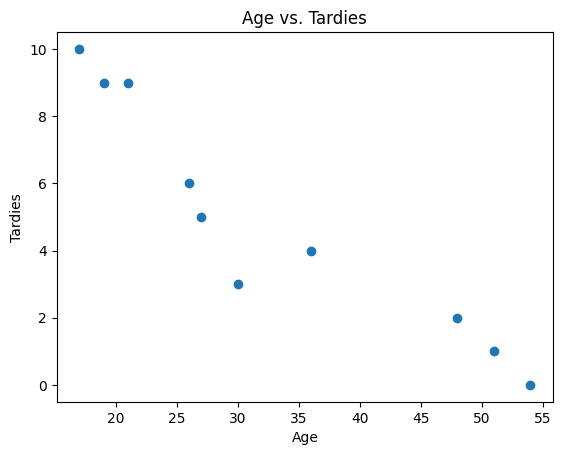

In [6]:
# Your code here
plt.scatter(x= student_data['Age'], y= student_data['Tardies'])
plt.title("Age vs. Tardies")
plt.xlabel('Age')
plt.ylabel('Tardies')
plt.show


Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

*your explanation here*

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [23]:
# your code here
covariance = student_data.cov()
correlation = student_data.corr()

print("Covariance:", covariance)
print("Correlation:", correlation)

Covariance:                 Age    Tardies
Age      187.655556 -45.566667
Tardies  -45.566667  12.544444
Correlation:               Age   Tardies
Age      1.000000 -0.939163
Tardies -0.939163  1.000000


Covariance measures the 'direction' of the relationship (positive or negative), but its magnitude depends on the units of measurement.
Correlation is the 'standardized' version of covariance always between -1 and +1, making it easier to interpret.

In this case, correlation is negative, showing that as Age increases, Tardies decrease.

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [22]:
# your explanation here

# Outcome or target variable (Y) = Tardies
# Independent variable (X) = Age
# Type of regression: Simple Linear Regression

x = student_data[['Age']]   
y = student_data['Tardies'] 

model = LinearRegression()
model.fit(x, y)

print(model.intercept_, model.coef_)



12.888803363135768 [-0.24282077]


Plot your regression model on your scatter plot.



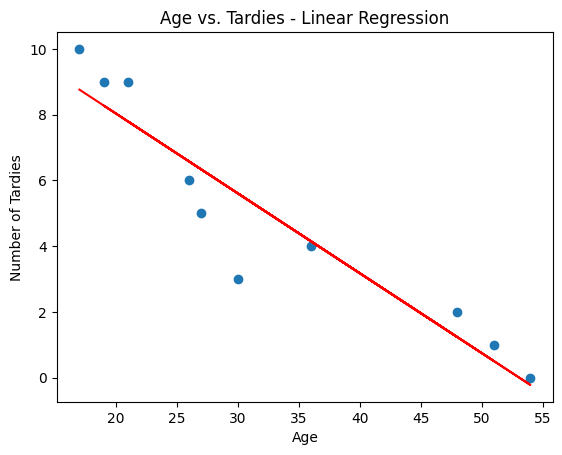

In [18]:
# Your code here.
y_pred = model.predict(x)

plt.scatter(x= student_data['Age'], y= student_data['Tardies'])
plt.plot(x,y_pred, color='red')
plt.title("Age vs. Tardies - Linear Regression")
plt.xlabel("Age")
plt.ylabel("Number of Tardies")
plt.show()


Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

Our regression shows a negative slope:
As students get older, they tend to be late less often.
To be confident we could calculate p-value and R2:
If p-value < 0.05 it would mean that it has a significant relationship.
If R² is close to 1 it would have a strong relationship.

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [20]:
# Import any libraries you may need & the data
vehicles = pd.read_csv(r"C:\Users\jgest\Desktop\IRONHACK\labs\week4\day4\lab-regression-analysis-en\vehicles.csv")

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [24]:
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


In [27]:
# Your code here.
target = 'CO2 Emission Grams/Mile'
features = ['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']

data = vehicles[features + [target]].dropna()
corr_with_target = data[features + [target]].corr()[target].sort_values(ascending=False)

print(corr_with_target)


CO2 Emission Grams/Mile    1.000000
Fuel Barrels/Year          0.986189
Fuel Cost/Year             0.930865
Cylinders                  0.752393
Year                      -0.222300
Combined MPG              -0.926229
Name: CO2 Emission Grams/Mile, dtype: float64


Fuel Barrels/Year would be the most important variable for determinating the CO2 Emissions because it has the highest correlation of all other variables. On the other hand, the least miningful variable for CO2 Emission prediction would be the Year variable as it has little negative almost neutral correlation.

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [33]:
# Your code here.
from sklearn.model_selection import train_test_split

X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

LR = LinearRegression()
LR.fit(X_train, y_train)

y_train_pred = LR.predict(X_train)
y_test_pred = LR.predict(X_test)

print(y_train_pred)
print(y_test_pred)

# It’s a multiple linear regression because the model predicts a continuous variable (CO₂ emissions) using several independent variables that have linear relationships with the outcome.



[441.13654442 294.88260127 445.55475899 ... 806.42884694 375.65330592
 553.6683316 ]
[342.67725676 516.83769373 437.23698384 ... 480.32478744 471.42274244
 587.67179739]


Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [34]:
# Your code here.
import statsmodels.api as sm
ols_model = sm.OLS(y_train, X_train).fit()
ols_summary = ols_model.summary()
print(ols_summary)

                                   OLS Regression Results                                   
Dep. Variable:     CO2 Emission Grams/Mile   R-squared (uncentered):                   0.999
Model:                                 OLS   Adj. R-squared (uncentered):              0.999
Method:                      Least Squares   F-statistic:                          4.960e+06
Date:                     Thu, 30 Oct 2025   Prob (F-statistic):                        0.00
Time:                             16:54:31   Log-Likelihood:                     -1.2174e+05
No. Observations:                    28761   AIC:                                  2.435e+05
Df Residuals:                        28756   BIC:                                  2.435e+05
Df Model:                                5                                                  
Covariance Type:                 nonrobust                                                  
                        coef    std err          t      P>|t|      [0.

Fuel Barrels/Year (coef = +20.03):

The largest positive coefficient and extremely high t-value (305).
Strongly significant (p value very small).
This means: vehicles that use more fuel per year produce much more CO₂ per mile. This makes physical sense — fuel consumption directly drives emissions.

Combined MPG (coef = −2.93):

Also highly significant (p value very small) with large absolute t-value (−61).
Negative coefficient → cars with better fuel efficiency (higher MPG) emit less CO₂. It’s inversely related to fuel barrels, so both measure efficiency in opposite ways.

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [ ]:
# Your code here.

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [ ]:
# Your code here.

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

*your explanation here*

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [2]:
# Your response here.

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

*your explanation here*